In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
def namestr(obj, namespace):
    return [name for name in namespace if namespace[name] is obj][0]

In [2]:
Lathed_I18_1_1 = pd.read_csv('Data/I-18 Lathed test 1_10242023_165010.csv')
Lathed_I18_1_2 = pd.read_csv('Data/I-18 Lathed test 2_10242023_165238.csv')
Lathed_I18_1_3 = pd.read_csv('Data/I-18 Lathed test 3_10242023_165444.csv') 
Lathed_I18_1_4 = pd.read_csv('Data/I-18 Lathed test 4_10242023_165714.csv')
Lathed_I18_1_5 = pd.read_csv('Data/I-18 Lathed test 5_10242023_165935.csv')
data_list = [Lathed_I18_1_1, Lathed_I18_1_2, Lathed_I18_1_3, Lathed_I18_1_4, Lathed_I18_1_5]
# convert in to um
for df in data_list:
    df['S:LVDT (um)'] = df['S:LVDT (in)'] * 25.4 * 1000

C:\Users\wang9\AppData\Local\Temp\ipykernel_19508\1389210162.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['S:LVDT (um)'] = data['S:LVDT (um)'] - data['S:LVDT (um)'].iloc[0]


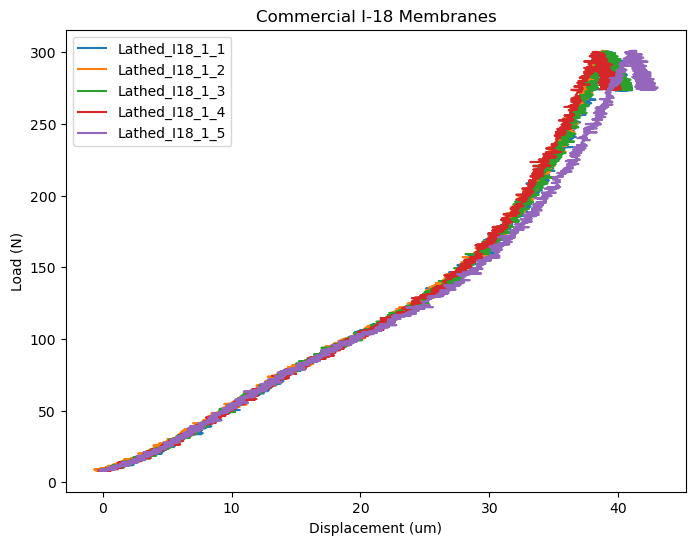

In [3]:
# Plot these in the same graph to compare them
plt.figure(figsize=(8, 6))
for i in range(len(data_list)):
    data_name = namestr(data_list[i], globals())
    data = data_list[i][data_list[i]['Ch:Load (N)'] > 8]
    # shift the data so that the first point is at 0 in 'S:LVDT (in)'
    data['S:LVDT (um)'] = data['S:LVDT (um)'] - data['S:LVDT (um)'].iloc[0]
    plt.plot(data['S:LVDT (um)'], data['Ch:Load (N)'], label=data_name)
# show title and labels
plt.title('Commercial I-18 Membranes')
plt.xlabel('Displacement (um)')
plt.ylabel('Load (N)')
plt.legend(loc='upper left')
plt.show()

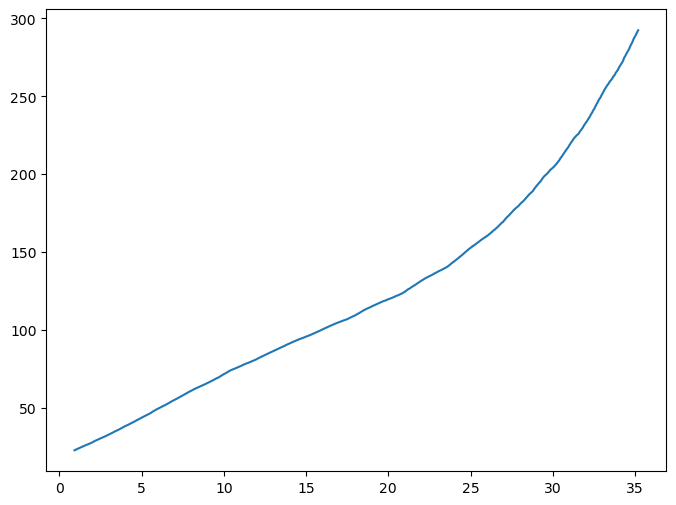

In [69]:
data = Lathed_I18_1_3[Lathed_I18_1_3['Ch:Load (N)'] > 20]
# discard the data after max 'Ch:Load (N)'
data = data.loc[:data['Ch:Load (N)'].idxmax()]
data['S:LVDT (um)'] = data['S:LVDT (um)'] - data['S:LVDT (um)'].iloc[0]
x = np.array(data['S:LVDT (um)'].rolling(window=100).mean().dropna())
y = np.array(data['Ch:Load (N)'].rolling(window=100).mean().dropna())
# x = np.array(data['S:LVDT (um)'])
# y = np.array(data['Ch:Load (N)'])
plt.figure(figsize=(8, 6))
plt.plot(x, y)

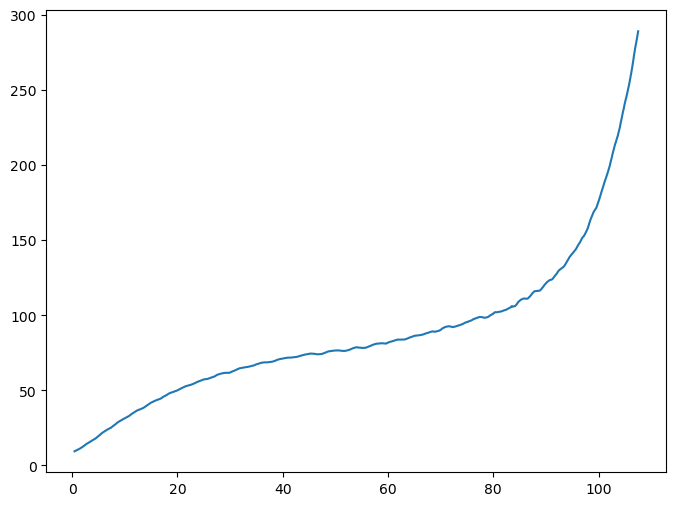

In [81]:
PSf_15wt_3 = pd.read_csv('Data/15% 30min RT - 1 - 3_07262023_145717.csv')
# convert in to um
PSf_15wt_3['S:LVDT (um)'] = PSf_15wt_3['S:LVDT (in)'] * 25.4 * 1000
data = PSf_15wt_3[PSf_15wt_3['Ch:Load (N)'] > 8]
# discard the data after max 'Ch:Load (N)'
data = data.loc[:data['Ch:Load (N)'].idxmax()]
data['S:LVDT (um)'] = data['S:LVDT (um)'] - data['S:LVDT (um)'].iloc[0]
x = np.array(data['S:LVDT (um)'].rolling(window=100).mean().dropna())
y = np.array(data['Ch:Load (N)'].rolling(window=100).mean().dropna())
# x = np.array(data['S:LVDT (um)'])
# y = np.array(data['Ch:Load (N)'])
plt.figure(figsize=(8, 6))
plt.plot(x, y)

# pwlf

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import pwlf

In [57]:
my_pwlf = pwlf.PiecewiseLinFit(x, y)
breaks = my_pwlf.fit(3)
print(breaks)

[ 0.         24.20979712 30.59534582 36.2458    ]


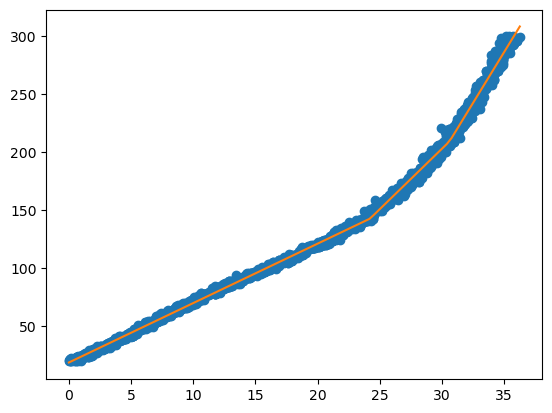

In [58]:
x_hat = np.linspace(x.min(), x.max(), 100)
y_hat = my_pwlf.predict(x_hat)

plt.figure()
plt.plot(x, y, 'o')
plt.plot(x_hat, y_hat, '-')
plt.show()

# Linear Tree

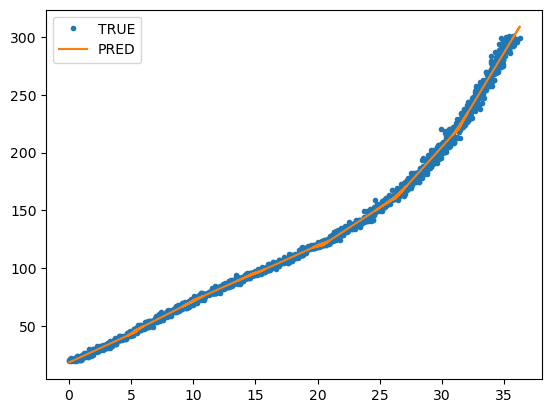

In [66]:
from sklearn.linear_model import *
from lineartree import LinearTreeRegressor, LinearTreeClassifier

model = LinearTreeRegressor(base_estimator=LinearRegression())
model.fit(x.reshape(-1,1), y.reshape(-1,1))

plt.plot(x.reshape(-1,1), y.reshape(-1,1), ".", label='TRUE')
plt.plot(x.reshape(-1,1), model.predict(x.reshape(-1,1)), label='PRED')
plt.legend()

# Piecewise Regression

In [82]:
import numpy as np
import matplotlib.pyplot as plt
import piecewise_regression

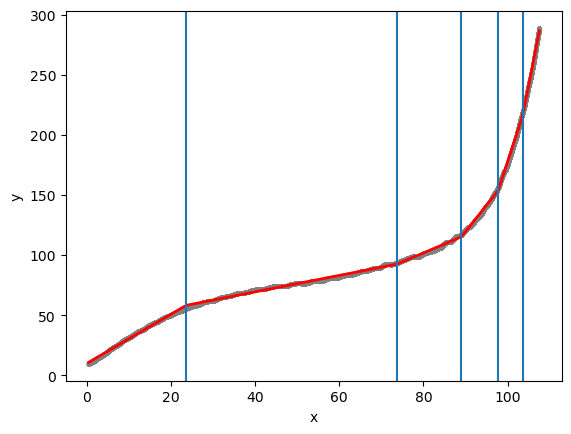


                    Breakpoint Regression Results                     
No. Observations                     6946
No. Model Parameters                   12
Degrees of Freedom                   6934
Res. Sum of Squares               10510.3
Total Sum of Squares          2.47914e+07
R Squared                        0.999576
Adjusted R Squared               0.999575
Converged:                           True
                    Estimate      Std Err            t        P>|t|       [0.025       0.975]
----------------------------------------------------------------------------------------------------
const                9.69616        0.063        153.8           0.0       9.5726       9.8197
alpha1               2.04603      0.00474       431.68           0.0       2.0367       2.0553
beta1               -1.36152      0.00502      -271.48             -      -1.3713      -1.3517
beta2               0.799009       0.0083       96.266             -      0.78274      0.81528
beta3            

'\n                    Breakpoint Regression Results                     \n====================================================================================================\nNo. Observations                     6946\nNo. Model Parameters                   12\nDegrees of Freedom                   6934\nRes. Sum of Squares               10510.3\nTotal Sum of Squares          2.47914e+07\nR Squared                        0.999576\nAdjusted R Squared               0.999575\nConverged:                           True\n====================================================================================================\n====================================================================================================\n                    Estimate      Std Err            t        P>|t|       [0.025       0.975]\n----------------------------------------------------------------------------------------------------\nconst                9.69616        0.063        153.8           0.0       9.5

In [88]:
pw_fit = piecewise_regression.Fit(x, y, n_breakpoints=5)
pw_fit.plot_fit(color="red", linewidth=2)
pw_fit.plot_data(color="grey", s=5)
pw_fit.plot_breakpoints()
pw_fit.plot_breakpoint_confidence_intervals()
plt.xlabel("x")
plt.ylabel("y")
plt.show()
pw_fit.summary()

In [86]:
# Get the key results of the fit
pw_results = pw_fit.get_results()
pw_estimates = pw_results["estimates"]

In [87]:
pw_results

{'estimates': {'const': {'estimate': 9.164595786041389,
   'se': 0.1306995355850266,
   'confidence_interval': (8.908384706478467, 9.42080686560431),
   't_stat': 70.11957422051711,
   'p_t': 0.0},
  'beta1': {'estimate': -1.3364989955261422,
   'se': 0.011086383859533696,
   'confidence_interval': (-1.3582316999645005, -1.3147662910877838),
   't_stat': -120.55319502371593,
   'p_t': '-'},
  'breakpoint1': {'estimate': 21.322433696736756,
   'se': 0.1186172379022124,
   'confidence_interval': (21.08990761742313, 21.55495977605038),
   't_stat': '-',
   'p_t': '-'},
  'beta2': {'estimate': 3.552434393629347,
   'se': 0.018868982774339488,
   'confidence_interval': (3.515445414095272, 3.5894233731634224),
   't_stat': 188.26846344151696,
   'p_t': '-'},
  'breakpoint2': {'estimate': 86.11052090322207,
   'se': 0.046313670551152625,
   'confidence_interval': (86.01973193846165, 86.20130986798249),
   't_stat': '-',
   'p_t': '-'},
  'beta3': {'estimate': 10.167480179360492,
   'se': 0.03